In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import struct

In [39]:
# LOAD MNIST
with open("t10k-labels.idx1-ubyte", 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    lbl = np.fromfile(flbl, dtype=np.int8)
with open("t10k-images.idx3-ubyte", 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))

    img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

In [52]:
threes = np.array([img[i] for i, l in enumerate(lbl) if l == 3])[:1000]

In [64]:
plt.gray()

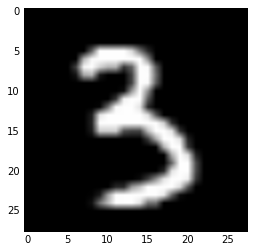

In [80]:
plt.imshow(threes[2])

In [54]:
import sklearn
from sklearn.decomposition import PCA

In [76]:
model = PCA(n_components=300)
low = model.fit_transform(threes.reshape(1000, -1))

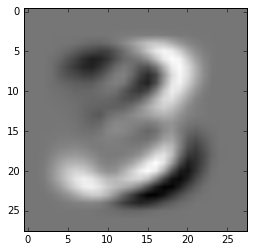

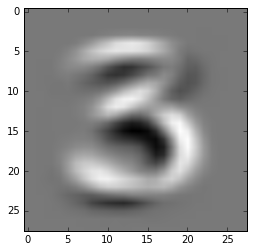

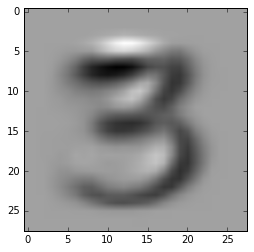

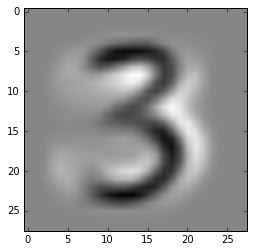

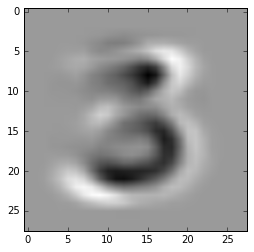

In [66]:
for i in range(5):
    plt.figure(i)
    plt.imshow(model.components_[i].reshape(28,28))

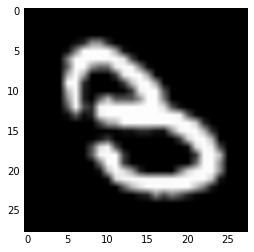

In [67]:
plt.imshow(threes[0])

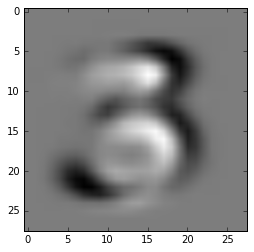

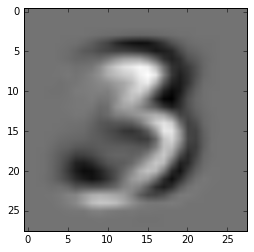

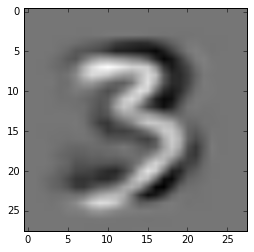

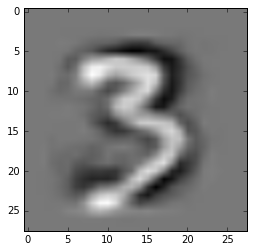

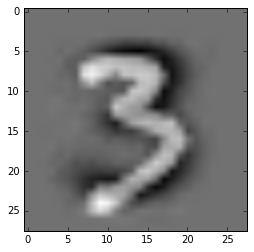

In [83]:
for i, comp in enumerate([5, 10, 50, 100, 300]):
    plt.figure(i)
    
    plt.imshow((sum([low[1][i] * model.components_[i] for i in range(comp)])).reshape(28,28))

In [87]:
model2 = PCA(n_components=2)
two = model2.fit_transform(threes.reshape(threes.shape[0], -1))

In [94]:
two.shape

(1000, 2)

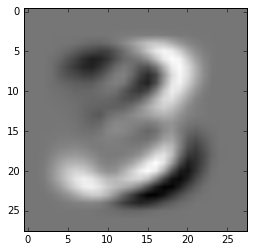

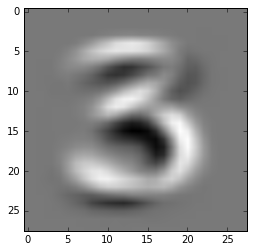

In [99]:
plt.imshow(model2.components_[0].reshape(28,28))
plt.figure(2)
plt.imshow(model2.components_[1].reshape(28,28))

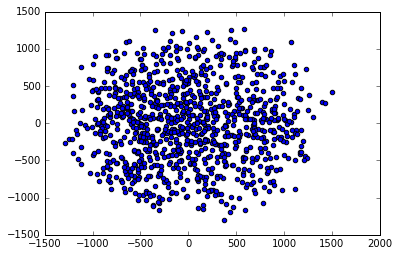

In [95]:
plt.scatter(x=two[:,0], y=two[:,1])